# plots: n-widths for transport problems 

if there is an error saying:
<div class="alert alert-danger">findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.</div>

[you need to delete matplotlib's cache!](https://github.com/matplotlib/matplotlib/issues/13139/)

```python
import matplotlib as mpl
mpl.get_cachedir()
```
and if that does not help,

[try this](https://stackoverflow.com/questions/42097053/matplotlib-cannot-find-basic-fonts/71356144#71356144)

or:

copy https://www.fontsquirrel.com/fonts/computer-modern into C:\Users\florianma\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf

In [1]:
import matplotlib as mpl

print(mpl.get_cachedir())
#mpl.font_manager._rebuild()
#print(mpl.font_manager.get_cachedir())

C:\Users\florianma\.matplotlib


In [2]:
import numpy as np
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap = plt.cm.plasma
page_width_pt = 455.24
pt2in = 0.01389
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rc('text', usetex=True)
plt.rcParams['text.usetex'] = True
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')

8.030570172000001


In [3]:
results_path = "C:/Users/florianma/Dropbox/Kol-N-width-Oslo-Ulm/n_widths_for_transport/results/"
rmse = {}
maxe = {}
SVs = {}
for j, bv_name in enumerate(["svd", "trigonometric", "greedy", "local neighbours average", "local pulse functions"]):
    print(bv_name)
    rmse[bv_name] = {}
    maxe[bv_name] = {}
    for i, ic_name in enumerate(["heaviside", "linear ramp", "smooth ramp", "smooth ramp, C^1", "smooth ramp, C^2", "smooth ramp, C^3", "smooth ramp, C^4", "sigmoid"]):
        rmse[bv_name][ic_name] = np.load(results_path+"rmse_"+bv_name+"_"+ic_name+".npy")
        maxe[bv_name][ic_name] = np.load(results_path+"maxe_"+bv_name+"_"+ic_name+".npy")
#for ic_name in ["smooth ramp, C^0", "smooth ramp, C^1", "smooth ramp, C^2", "smooth ramp, C^3", "sigmoid", "heaviside"]:
        SVs[ic_name] = np.load(results_path+"SV_"+ic_name+".npy")
x = np.load(results_path+"x.npy")

svd
trigonometric
greedy
local neighbours average
local pulse functions


In [4]:
def plot(rmse, estimate):
    l = rmse != 0
    rmse /= rmse[l][0]
    fig, ax = plt.subplots()
    ax.plot(rmse, "k.", ms=2)
    #ax.plot(estimate, "r--")
    ax.set_yscale('log')
#    plt.legend(prop={'size': 8})
    plt.ylim([1e-8, 1])
    plt.xlim([0, 500])
    plt.xlabel("order")
    plt.ylabel("singular value")
    plt.grid(which="both")
    return ax

def plot2(rmse, estimate):
    l = rmse != 0
    rmse /= rmse[l][0]
    fig, ax = plt.subplots()
    ax.plot(1/ rmse, "k.", ms=2)
    ax.plot(1/ estimate, "r--")
    #ax.set_yscale('log')
#    plt.legend(prop={'size': 8})
    #plt.ylim([1e-12, 1])
    plt.xlim([0, 500])
    plt.xlabel("order")
    plt.ylabel("1/rmse")
    return ax

In [5]:
n = np.arange(500)

<ipython-input-6-19cce4f92f83>:6: RuntimeWarning: divide by zero encountered in true_divide
  estimate = .5/n


(0.0, 1000.0)

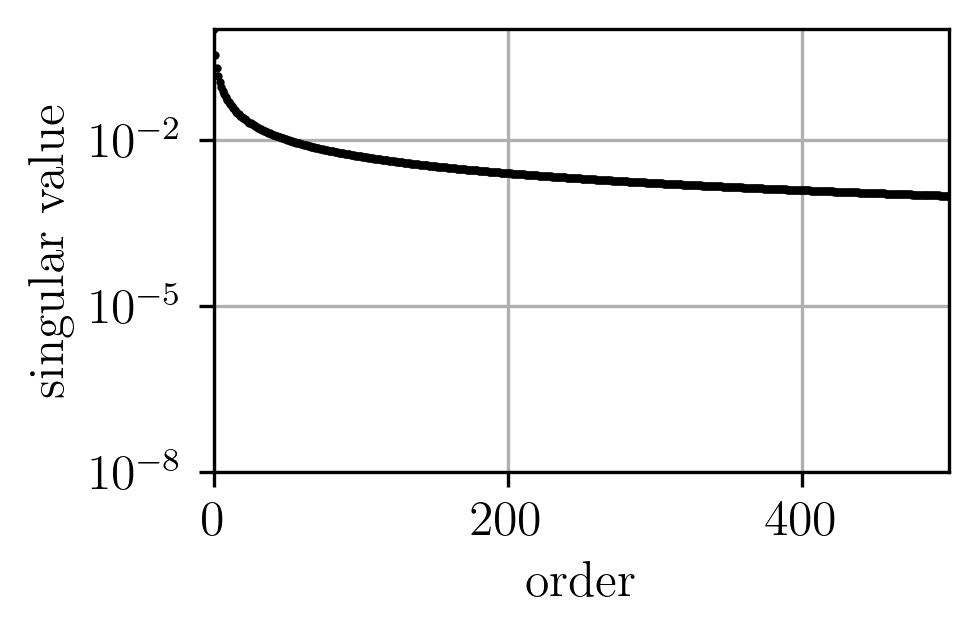

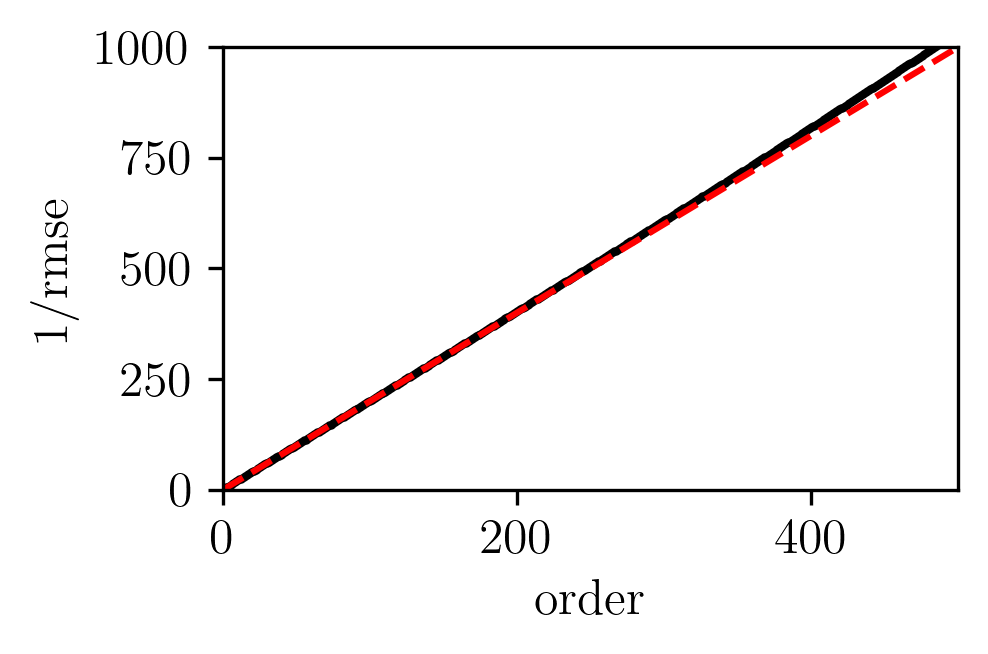

In [6]:
bv_name = "svd"
ic_name = "heaviside"
err = rmse[bv_name][ic_name]
#err = err[err!=0.0]
S = SVs[ic_name]
estimate = .5/n
plot(S, estimate)
ax = plot2(S, estimate)
ax.set_ylim([0, 1e3])

<ipython-input-7-e7b19f9babc6>:5: RuntimeWarning: divide by zero encountered in true_divide
  estimate1 = (2 / (n * np.pi**2))**.5
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


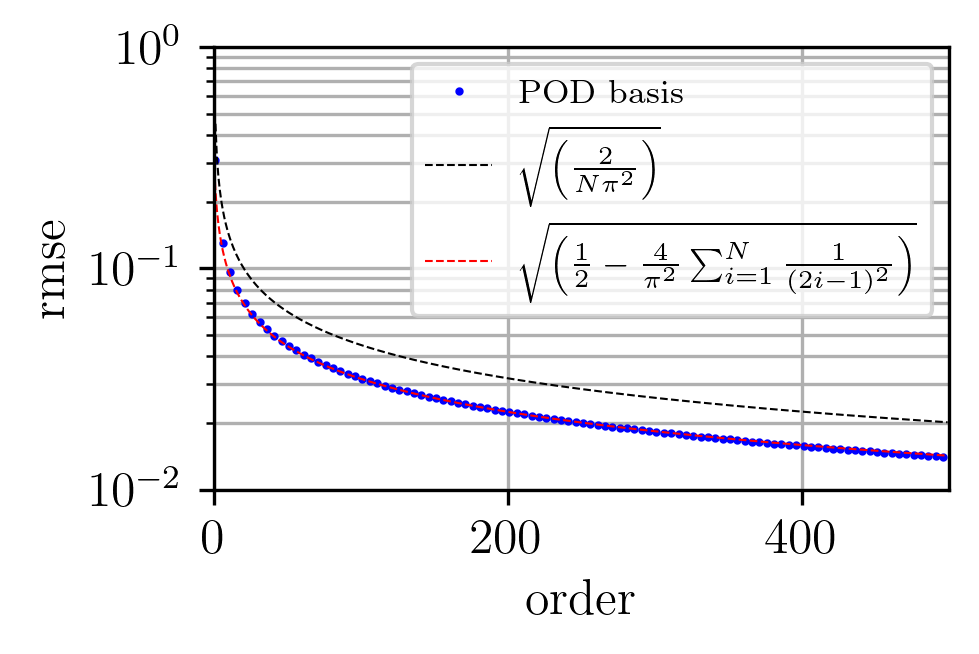

In [7]:
bv_name = "svd"
ic_name = "heaviside"
err = rmse[bv_name][ic_name]

estimate1 = (2 / (n * np.pi**2))**.5
i = n[1:]
the_sum = np.cumsum(1/(2*i - 1)**2)
estimate2 = (1/2 - 4/np.pi**2 * the_sum) **.5
lbl1 = r'$\sqrt {\left( \frac{2}{N \pi^2} \right)}$'
lbl2 =  r'$\sqrt {\left( \frac{1}{2} - \frac{4}{\pi^2} \sum_{i=1}^N  \frac{1}{(2i-1)^2 } \right)}$'
#lbl2 = r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty \frac{-e^{i\pi}}{2^n}$!'
fig, ax = plt.subplots()
ax.plot(err, "b.", ms=2, label="POD basis")
ax.plot(estimate1, "k--", label=lbl1, lw=.5)
ax.plot(estimate2, "r--", label=lbl2, lw=.5)
plt.legend(prop={'size': 8})
ax.set_yscale('log')
plt.ylim([1e-2, 1])
plt.xlim([0, 500])
plt.xlabel("order")
plt.ylabel("rmse")
plt.grid(which="both")

<ipython-input-8-fbd570157bf1>:7: RuntimeWarning: divide by zero encountered in true_divide
  estimate1 = 1 / (2 * n**0.5)
<ipython-input-8-fbd570157bf1>:8: RuntimeWarning: divide by zero encountered in true_divide
  estimate2 = 1 / (4 * n**0.5)


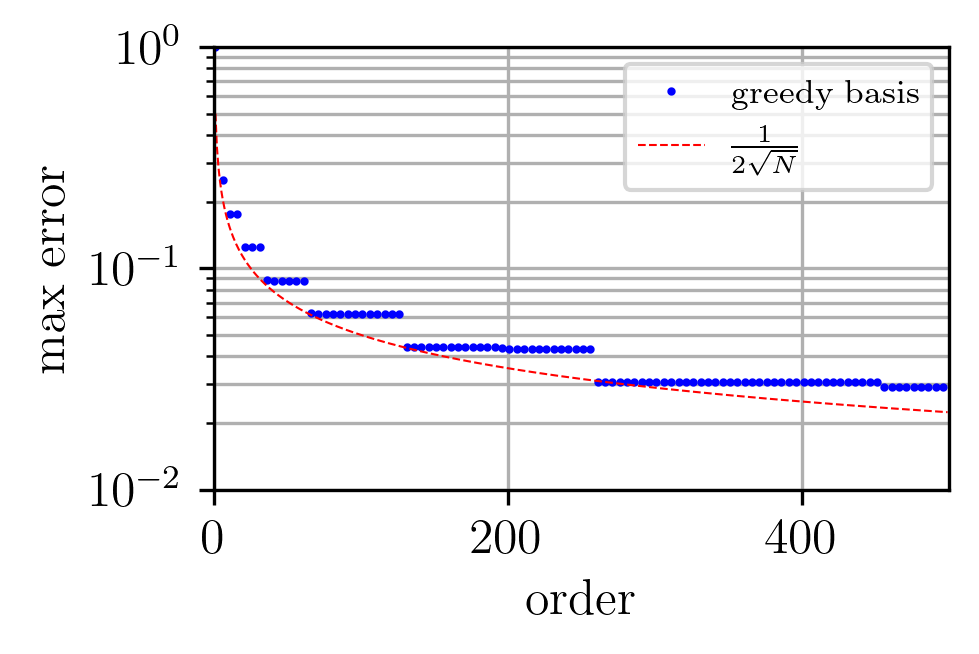

In [8]:
bv_name = "svd"
bv_name = "local neighbours average"
bv_name = "greedy"
ic_name = "heaviside"
err = maxe[bv_name][ic_name]
#err = err[err!=0]
estimate1 = 1 / (2 * n**0.5)
estimate2 = 1 / (4 * n**0.5)
lbl1 = r'$\frac{1}{2 \sqrt {N}} $'
lbl2 = r'$\frac{1}{4 \sqrt {N}} $'
fig, ax = plt.subplots()
ax.plot(err, "b.", ms=2, label="greedy basis")
ax.plot(estimate1, "r--", label=lbl1, lw=.5)
#ax.plot(estimate2, "g--", label=lbl2)

plt.legend(prop={'size': 8})
ax.set_yscale('log')
plt.ylim([1e-2, 1])
plt.xlim([0, 500])
plt.xlabel("order")
plt.ylabel("max error")
plt.grid(which="both")

<ipython-input-9-ae1fb40a6f6e>:5: RuntimeWarning: divide by zero encountered in true_divide
  estimate = 3.5/n**2


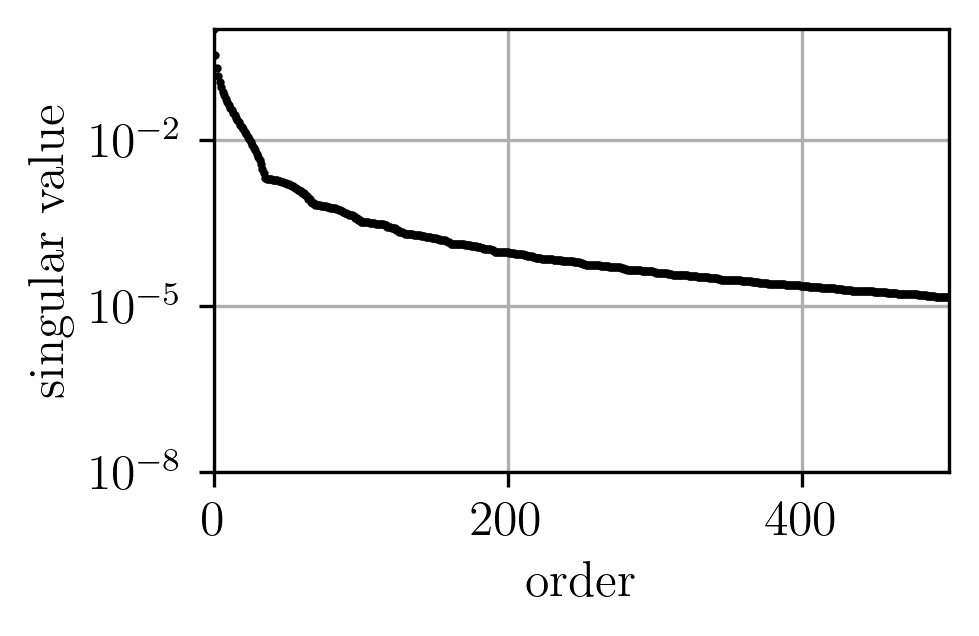

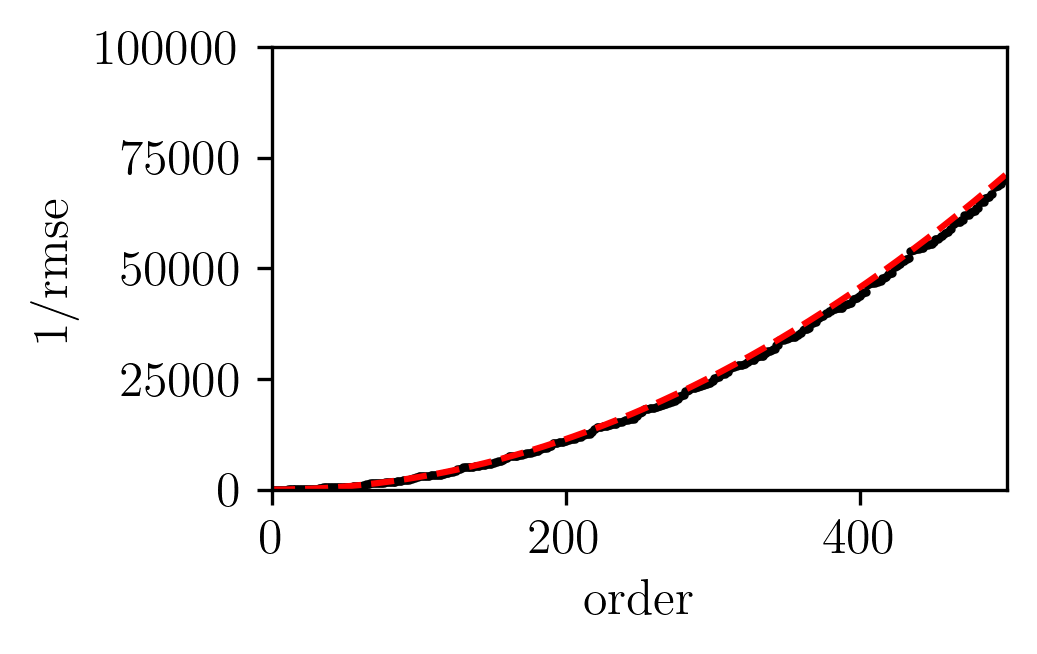

In [9]:
bv_name = "svd"
ic_name = "linear ramp"
err = rmse[bv_name][ic_name]
S = SVs[ic_name]
estimate = 3.5/n**2
plot(S, estimate)
ax = plot2(S, estimate)
ax.set_ylim([0, 1e5])
plt.show()
#print(1/S)
#print(1/estimate)

<ipython-input-10-7bf37586a53d>:5: RuntimeWarning: divide by zero encountered in true_divide
  estimate = 75/n**3


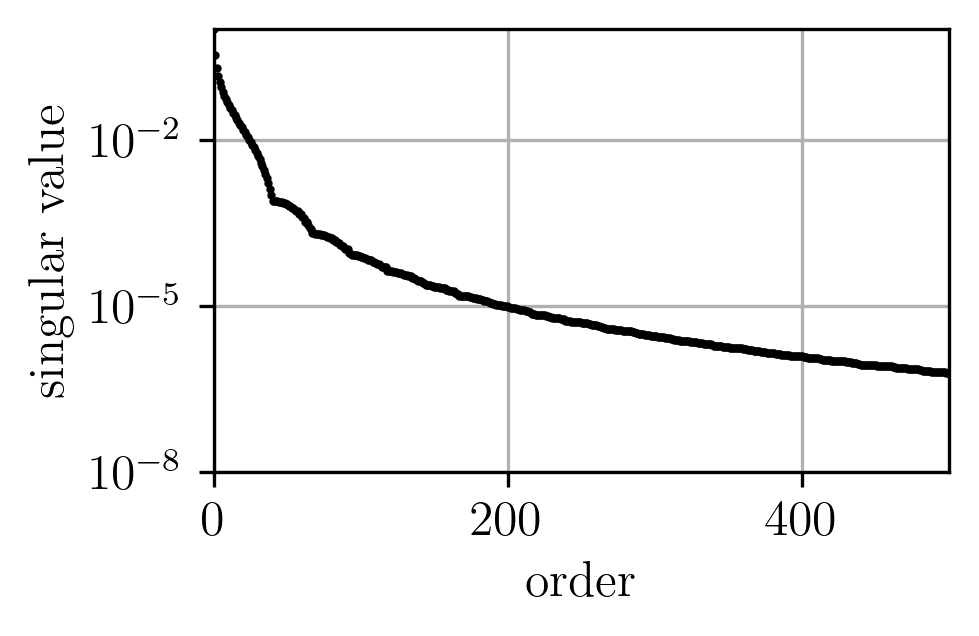

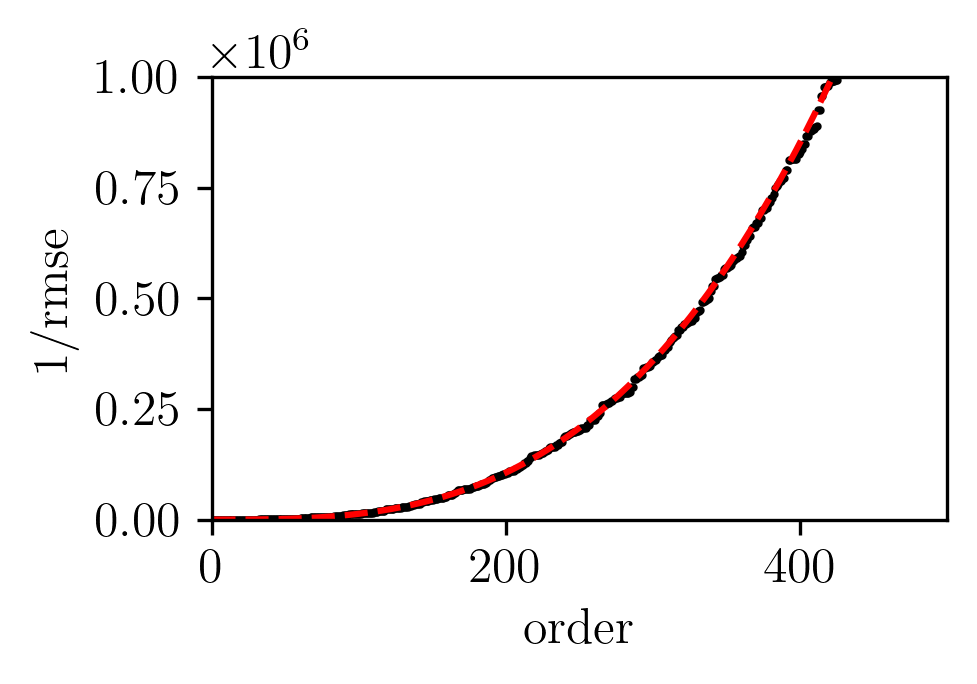

In [10]:
bv_name = "svd"
ic_name = "smooth ramp, C^1"
err = rmse[bv_name][ic_name]
S = SVs[ic_name]
estimate = 75/n**3
#estimate = .5/n**2
ax = plot(S, estimate)
#ax.set_ylim([1e-8, 1])
plt.show()

ax = plot2(S, estimate)
ax.set_ylim([0, 1e6])
plt.show()

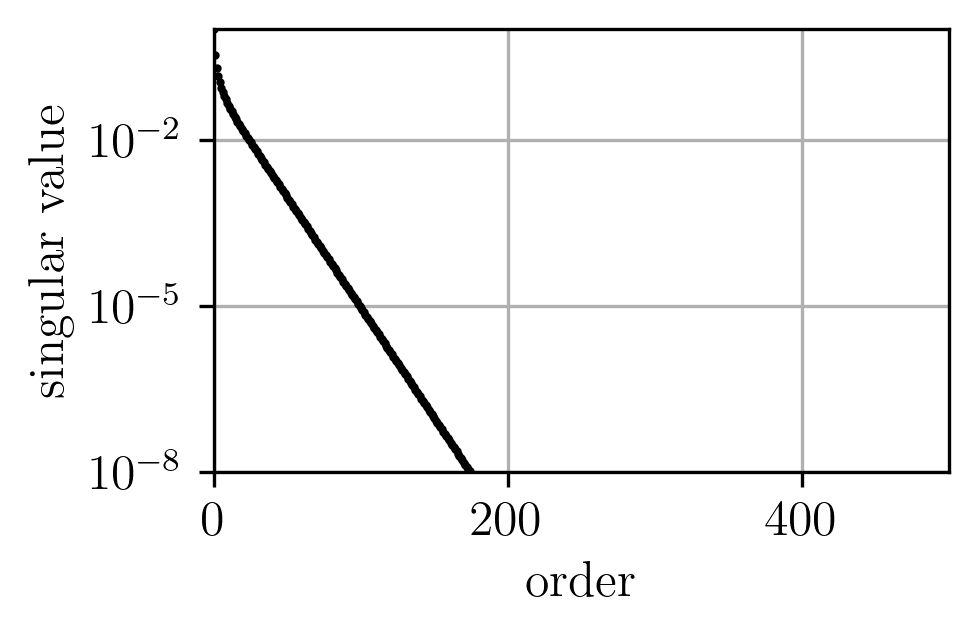

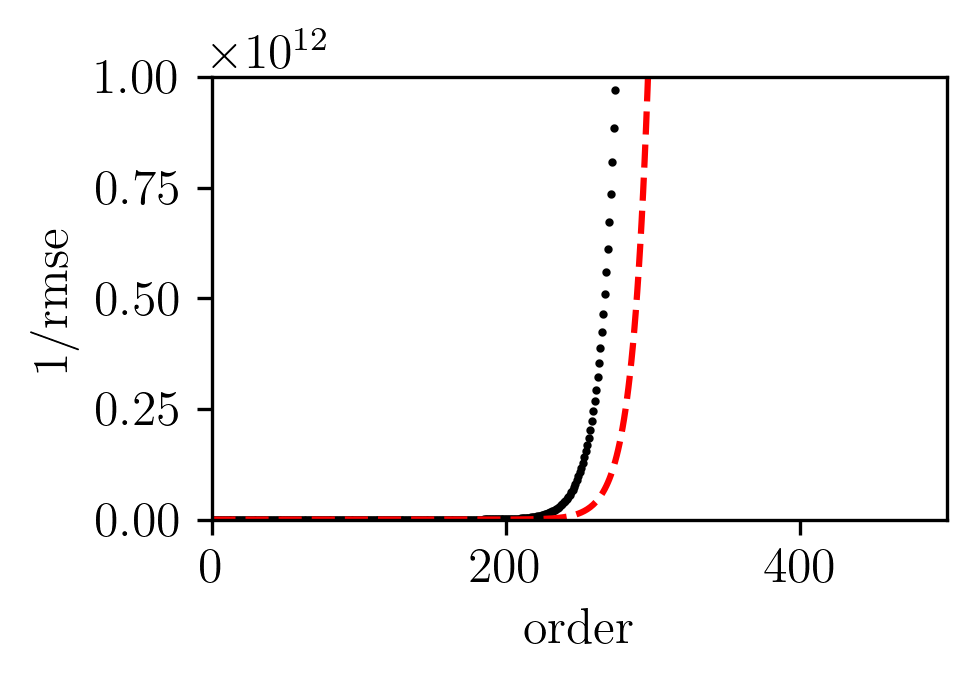

In [11]:
bv_name = "svd"
ic_name = "sigmoid"
err = rmse[bv_name][ic_name]
S = SVs[ic_name]
estimate = .5/np.exp(n/11)
ax = plot(S, estimate)
#ax.set_ylim([1e-12, 1])
plt.show()

ax = plot2(S, estimate)
ax.set_ylim([1, 1e12])
plt.show()

In [12]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Greedy, LNA, LPF

-1
mu_test =  0.5000500050005001
epsilon =  0.05
cov =  [[inf]]
mu_test =  0.5000500050005001


C:\Users\florianma\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


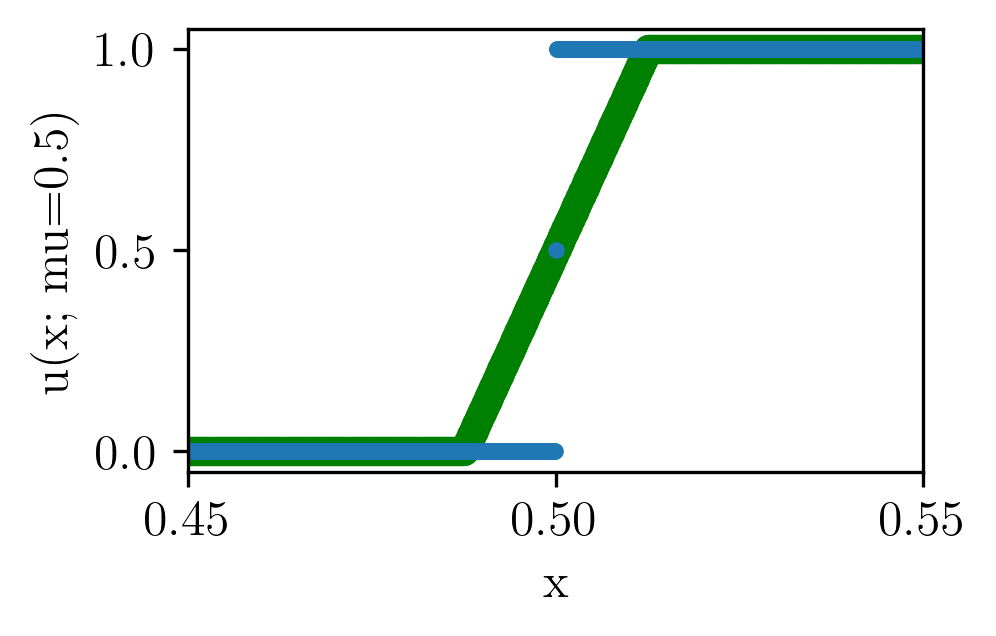

heaviside
mu_test =  0.50025


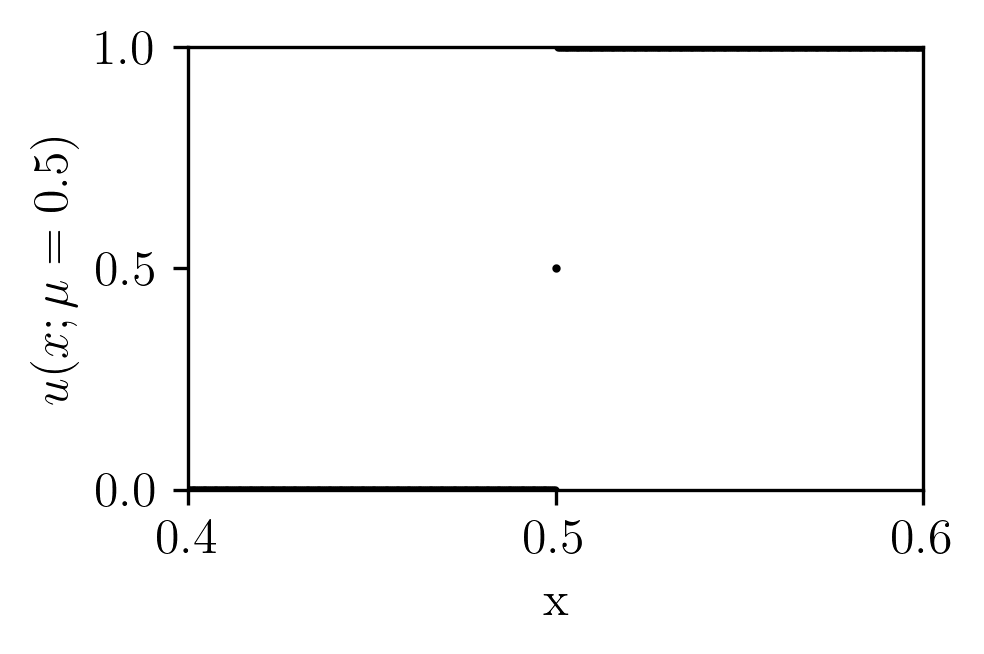

<ipython-input-13-f7d88acb179b>:34: RuntimeWarning: divide by zero encountered in true_divide
  ax = plot(S, estimate=1/n)


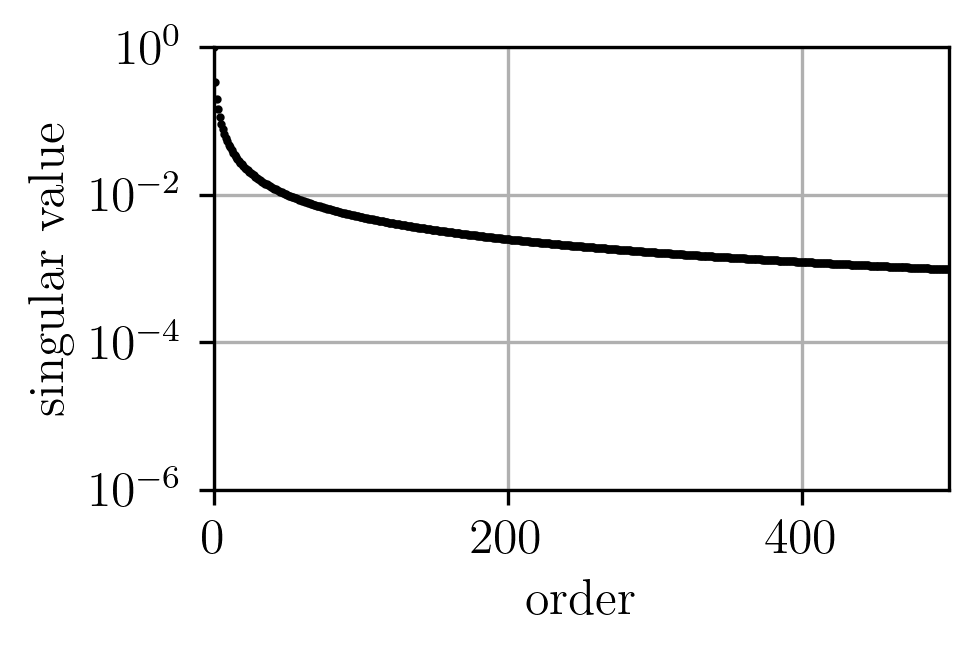

0
mu_test =  0.5000500050005001
epsilon =  0.025
cov =  [[0.]]
mu_test =  0.5000500050005001


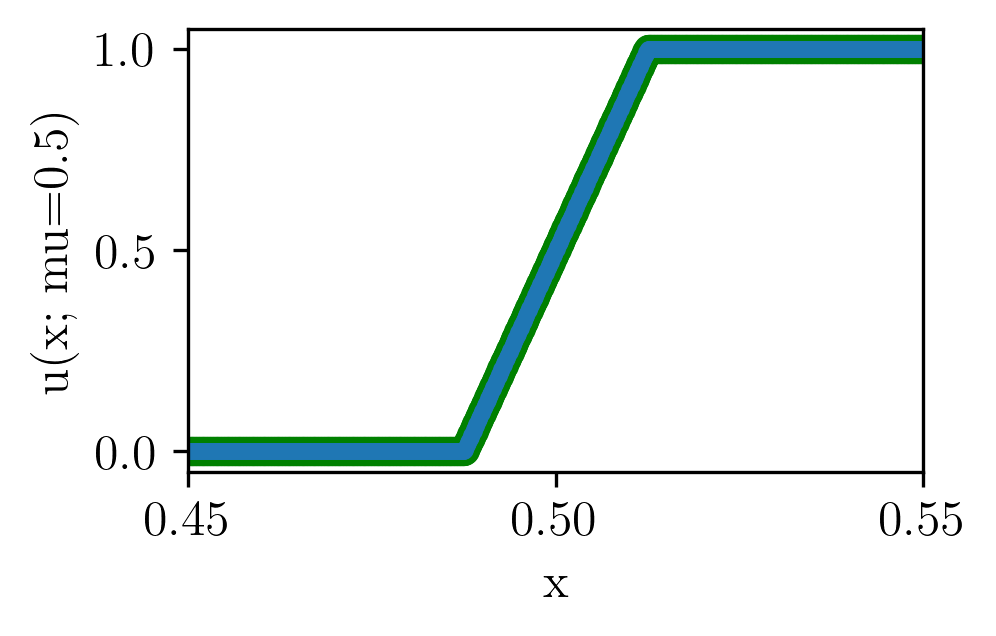

smooth ramp, C^0
mu_test =  0.50025


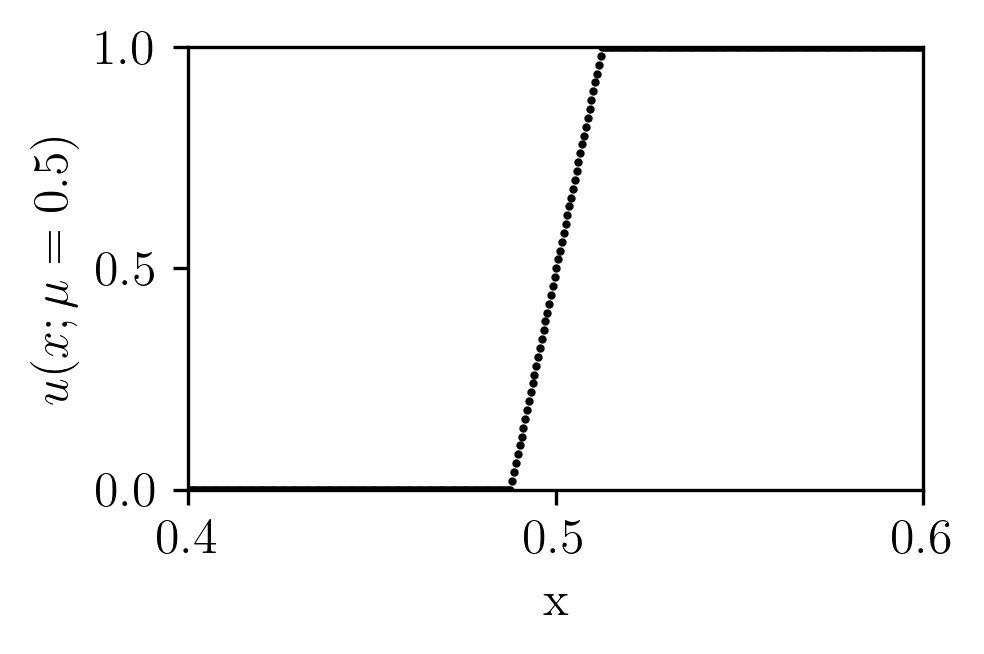

<ipython-input-13-f7d88acb179b>:34: RuntimeWarning: divide by zero encountered in true_divide
  ax = plot(S, estimate=1/n)


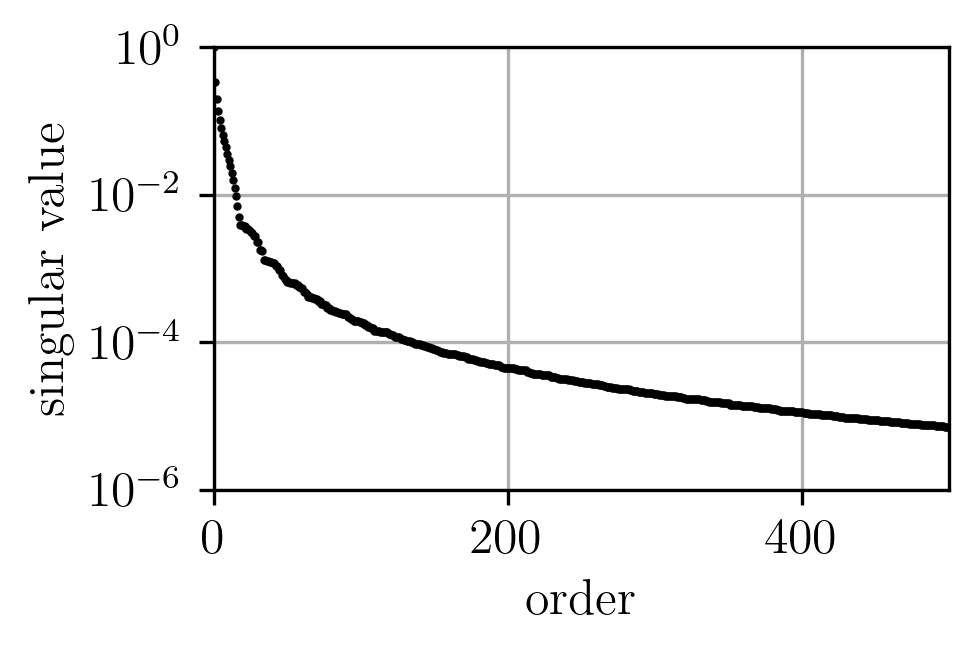

1
mu_test =  0.5000500050005001
epsilon =  0.03316168328741189
cov =  [[7.34920826e-10]]
mu_test =  0.5000500050005001


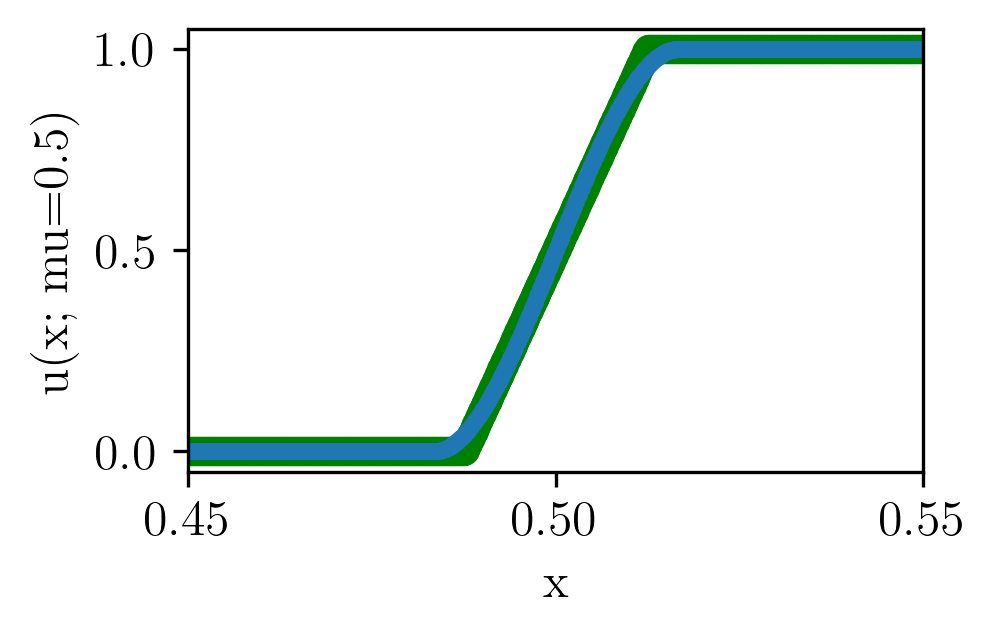

smooth ramp, C^1
mu_test =  0.50025


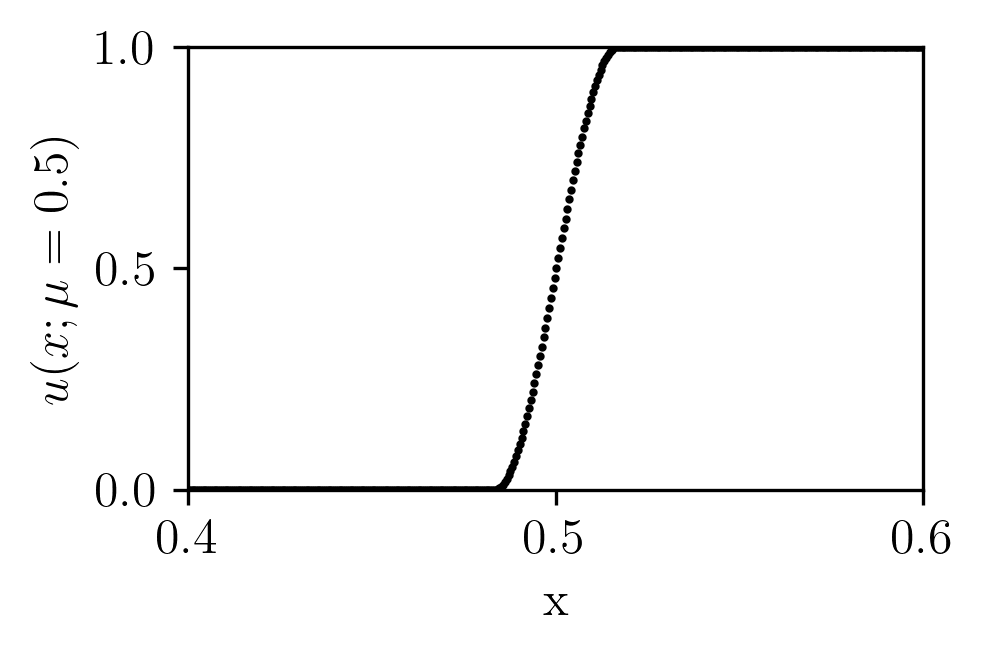

<ipython-input-13-f7d88acb179b>:34: RuntimeWarning: divide by zero encountered in true_divide
  ax = plot(S, estimate=1/n)


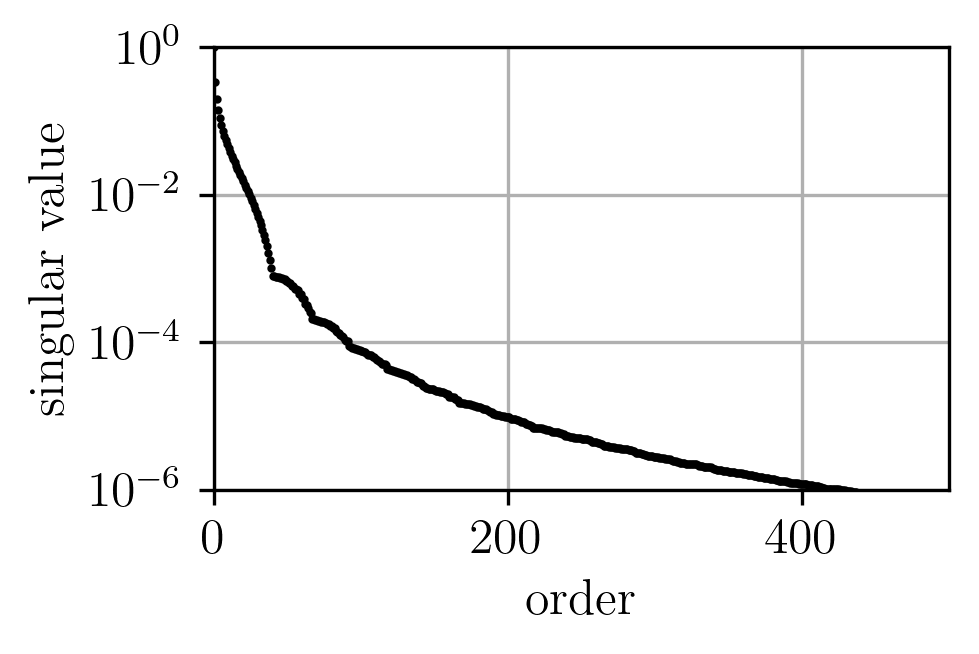

2
mu_test =  0.5000500050005001
epsilon =  0.04001922754234522
cov =  [[1.92915843e-09]]
mu_test =  0.5000500050005001


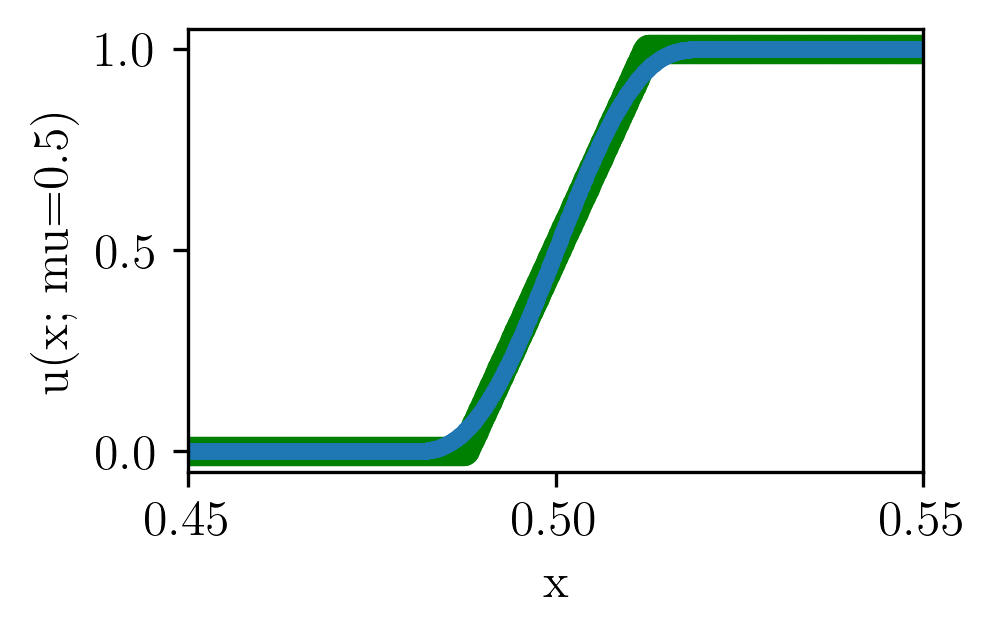

smooth ramp, C^2
mu_test =  0.50025


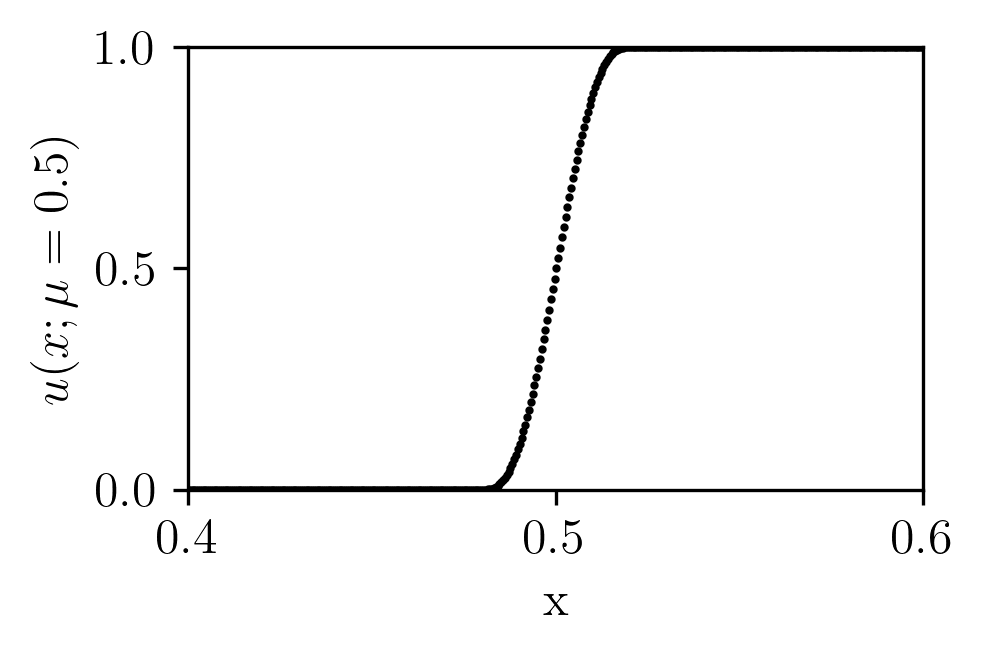

<ipython-input-13-f7d88acb179b>:34: RuntimeWarning: divide by zero encountered in true_divide
  ax = plot(S, estimate=1/n)


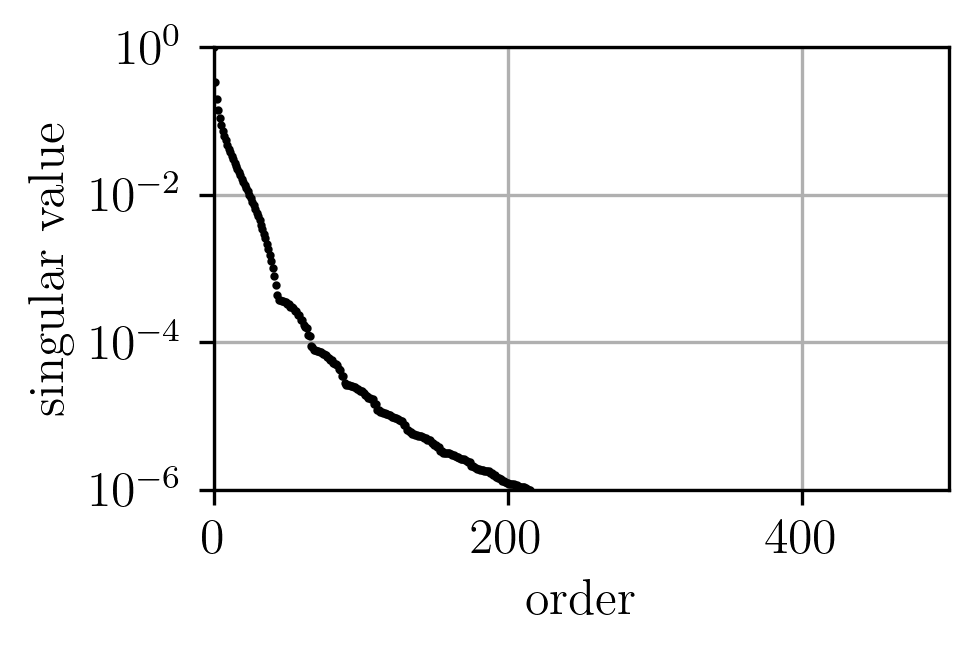

3
mu_test =  0.5000500050005001
epsilon =  0.04591862571115181
cov =  [[3.22181004e-09]]
mu_test =  0.5000500050005001


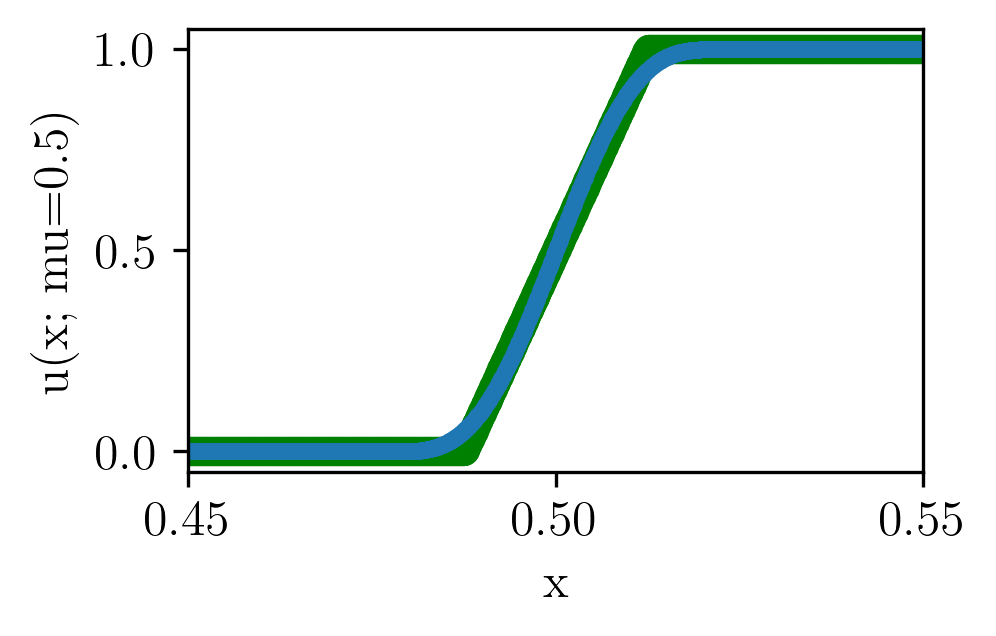

smooth ramp, C^3
mu_test =  0.50025


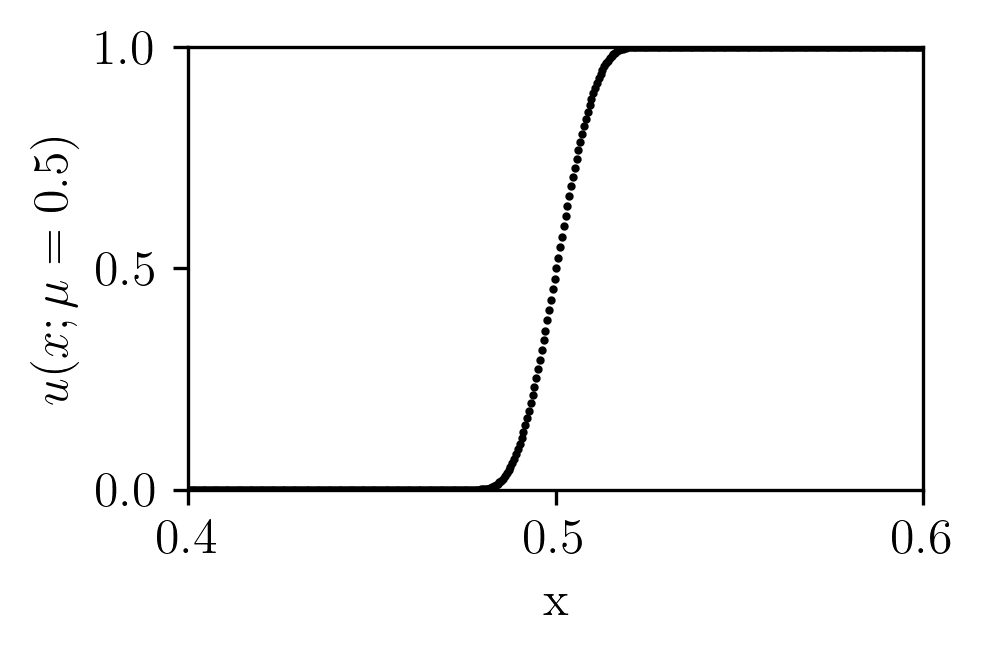

<ipython-input-13-f7d88acb179b>:34: RuntimeWarning: divide by zero encountered in true_divide
  ax = plot(S, estimate=1/n)


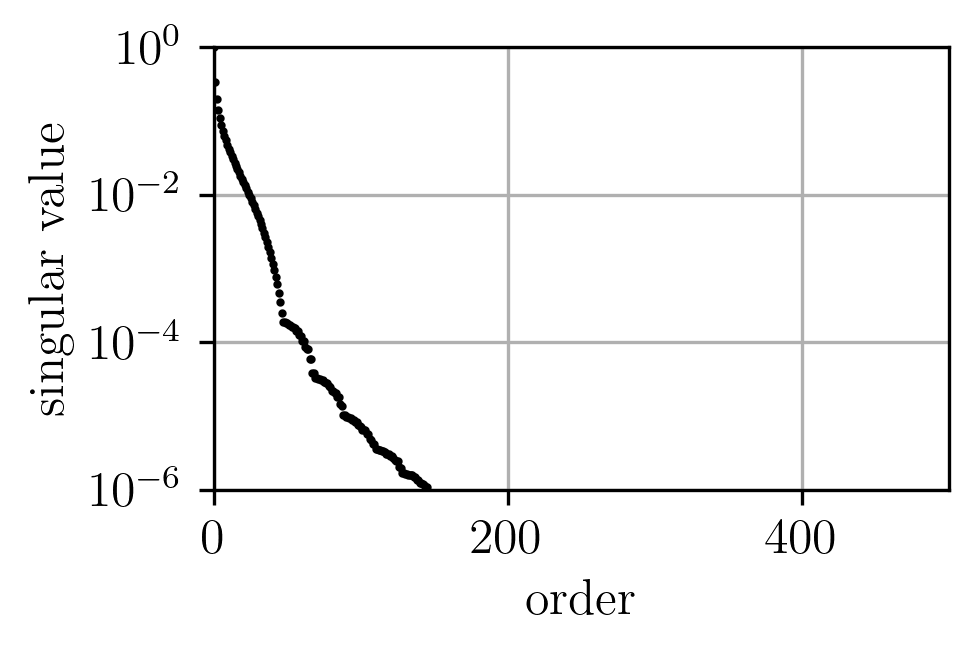

4
mu_test =  0.5000500050005001
epsilon =  0.004715931089478674
cov =  [[1.03382933e-10]]
mu_test =  0.5000500050005001


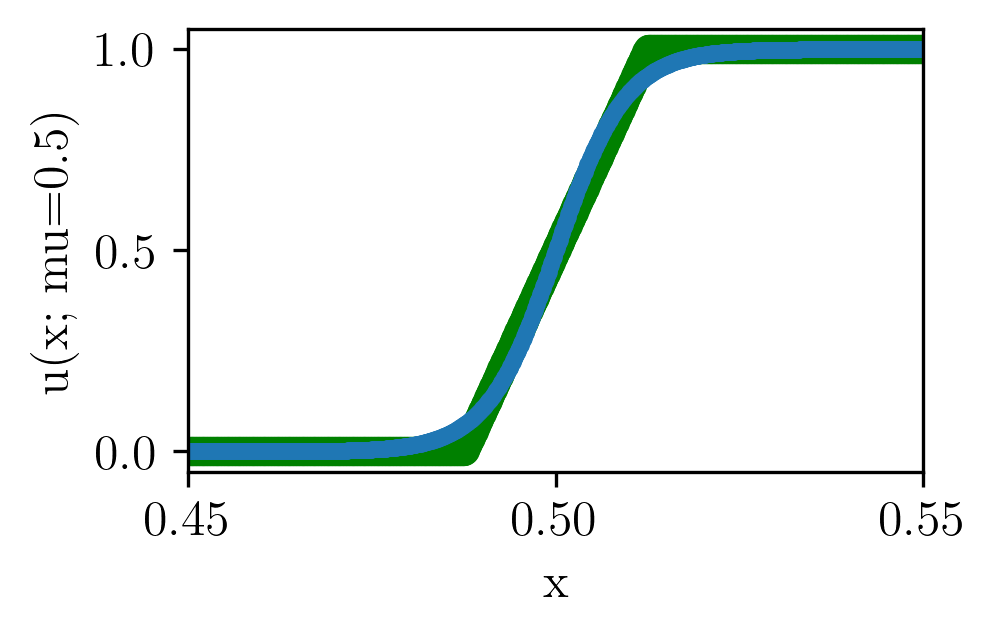

sigmoid
mu_test =  0.50025


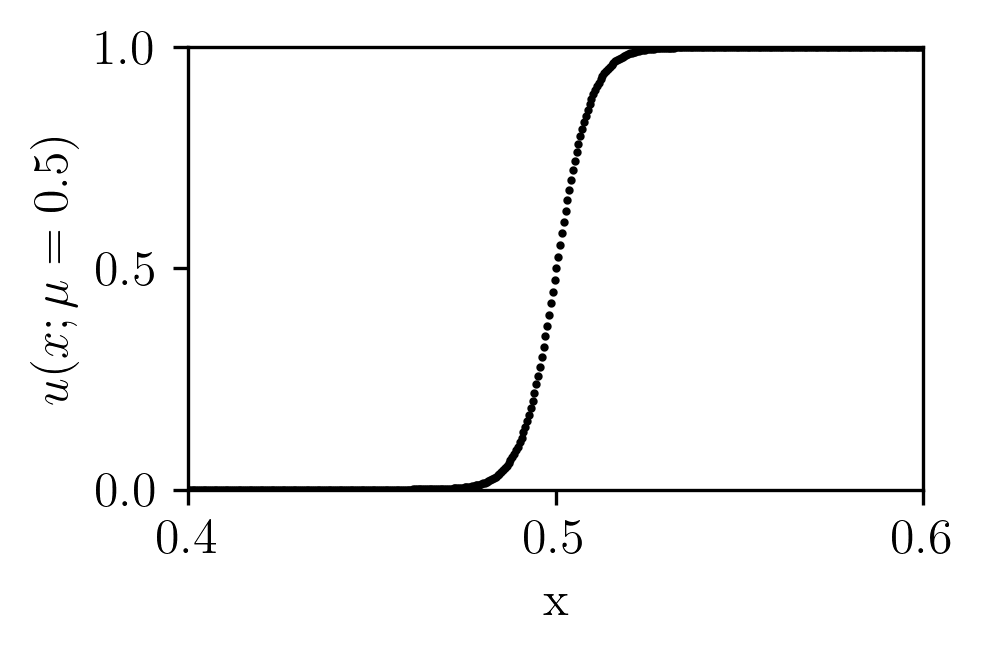

<ipython-input-13-f7d88acb179b>:34: RuntimeWarning: divide by zero encountered in true_divide
  ax = plot(S, estimate=1/n)


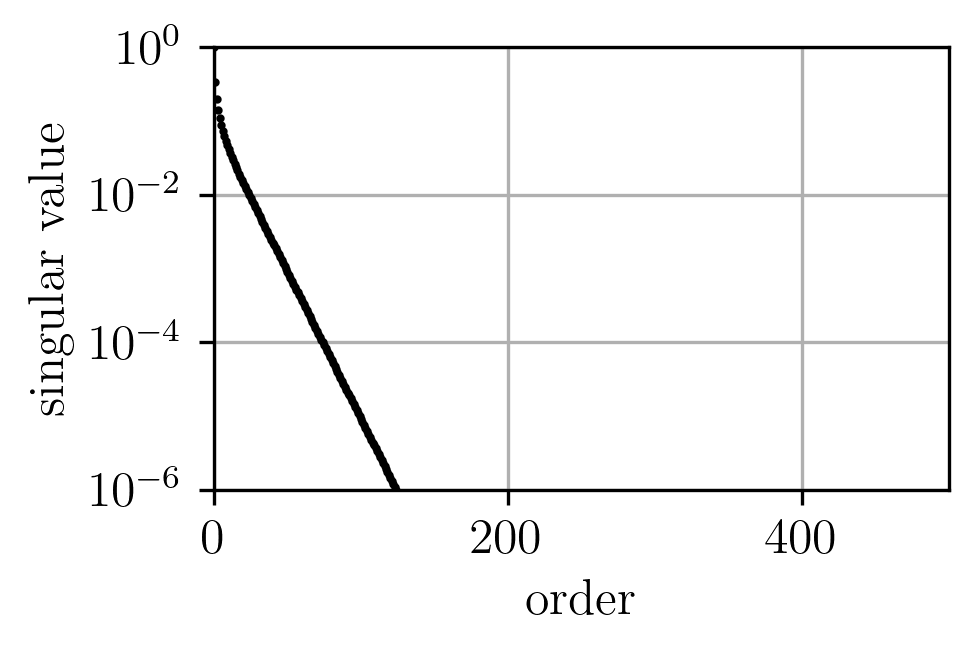

In [13]:
x = Domain([0, 1], 2000)
tt = np.linspace(0, 1, 10000)

u_C0 = CkRamp(0.025, 0)
for k in range(-1, 5):
    print(k)
    if k == -1:
        u_Ck = Heaviside()
    elif k == 4:
        u_Ck = Sigmoid(a=50)
    else:
        u_Ck = CkRamp(0.025, k)
    u_Ck.fit_to(u_C0, tt)
    print(u_Ck.name)
    
    ax = u_Ck.plot(x(), color="k", ms=2)
    ax.set_ylabel(r'$u(x; \mu=0.5)$')
#                  "u(x; \mu={:.1f})".format(0.5))
    ax.set_xlim([0.4, 0.6])
    ax.set_xticks([0.4, 0.5, 0.6])
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_ylim([0, 1])
    plt.show()
    
    #x = Domain([0, 1], 2000)
    #mu = Domain([0, 1], 1000)
    #X = u_Ck(x(), mu())
    #svd_basis = SVD(X)
#    u_Ck.S = svd_basis.S
    #np.save(results_path+"SV_"+u_Ck.name+".npy", svd_basis.S)
    
    
    S = np.load(results_path+"SV_"+u_Ck.name+".npy")
    ax = plot(S, estimate=1/n)
    ax.set_ylim([1e-6, 1])
    plt.show()